In [25]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
page=requests.get('https://www.karar.com/yazarlar/zafer-acar')

In [3]:
soup=BeautifulSoup(page.content,'html.parser')

In [4]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="tr">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Zafer Acar - KARAR</title>
<meta content="Zafer Acar tarafından KARAR için yazılan makaleler" name="description"/>
<link href="https://www.karar.com/yazarlar/zafer-acar" rel="canonical"/>
<meta content="website" property="og:type"/>
<meta content="KARAR" property="og:site_name"/>
<meta content="https://www.karar.com/yazarlar/zafer-acar" property="og:url"/>
<meta content="Zafer Acar" property="og:title"/>
<meta content="Zafer Acar tarafından KARAR için yazılan makaleler" property="og:description"/>
<meta content="https://cdn.karar.com/author/75_b.jpg" property="og:image"/>
<meta content="200" property="og:image:width"/>
<meta content="200" property="og:image:height"/>
<meta content="app-id=1009271502" name="apple-itunes-app"/>
<meta content="app-id=com.labdroids.k

In [5]:
linkler=soup.find_all('article',{'class':'item box-shadow'})

In [6]:
linkler

[<article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/engellilerin-umudu-yapay-zeka-1590090">
 <h3>Engellilerin umudu yapay zeka</h3>
 <p>Yapay zeka her alanda büyük değişimler ve gelişimler vaad ediyor. Almanya’da yapılan yeni bir araştırma, görme engelli vatandaşlarımızın...</p>
 </a>
 <time datetime="2021-07-19 00:23:00">19.07.2021</time>
 </article>,
 <article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/kuantum-yapay-zeka-1590019">
 <h3>Kuantum yapay zeka</h3>
 <p>Teknolojik gelişmeler baş döndürücü hızla ilerliyor. Önümüzdeki 30 yıl yapay zeka yılı olacak derken, kuantum bilgisayarlar büyük bir ilerleme...</p>
 </a>
 <time datetime="2021-07-12 00:06:00">12.07.2021</time>
 </article>,
 <article class="item box-shadow">
 <a href="/yazarlar/zafer-acar/astronot-001-1589950">
 <h3>Astronot 001</h3>
 <p>Uzay çalışmaları ve uçuşları küçüklüğümden beri hep ilgimi çekmiştir. Özellikle son 12 yıldır nerede bir astronomi etkinliği olursa,...</p>
 </a>
 <time datetime=

In [7]:
yazilar=[]
basliklar=[]
for yazi in linkler:
    link='https://www.karar.com'+yazi.a.get('href')
    print(link)

https://www.karar.com/yazarlar/zafer-acar/engellilerin-umudu-yapay-zeka-1590090
https://www.karar.com/yazarlar/zafer-acar/kuantum-yapay-zeka-1590019
https://www.karar.com/yazarlar/zafer-acar/astronot-001-1589950
https://www.karar.com/yazarlar/zafer-acar/cinin-uzay-programi-tam-gaz-1589817
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ile-cip-tasarimi-1589750
https://www.karar.com/yazarlar/zafer-acar/venusun-iki-ziyaretcisi-1589681
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ile-gercekci-oyun-grafikleri-1589609
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-is-dunyasini-derinden-sarsiyor-1589535
https://www.karar.com/yazarlar/zafer-acar/kariyerinize-yapay-zekayi-ekleyin-1589470
https://www.karar.com/yazarlar/zafer-acar/yapay-zeka-ogrenmek-hic-bu-kadar-kolay-olmamisti-1589397
https://www.karar.com/yazarlar/zafer-acar/spacex-bu-isi-biliyor-1589251
https://www.karar.com/yazarlar/zafer-acar/butun-evren-bir-yapay-zeka-algoritmasi-mi-1589178
https://www.karar.com/yazarla

In [8]:
yazilar=[]
basliklar=[]
for yazi in linkler:
    link='https://www.karar.com'+yazi.a.get('href')
    baslik=yazi.h3.text
    page2=requests.get(link)
    soup2=BeautifulSoup(page2.content,'html.parser')
    baslik2=soup2.find('h1',{'class':'content-title'}).text
    makale=soup2.find('article',{'class':'article-content'}).text
    yazilar.append(makale)
    basliklar.append(baslik)

In [9]:
df=pd.DataFrame(columns=['baslik','yazi'])

In [10]:
df['baslik']=basliklar
df['yazi']=yazilar

In [12]:
df.head(50)

,baslik,yazi
0,Engellilerin umudu yapay zeka,\n\nYapay zeka her alanda büyük değişimler ve ...
1,Kuantum yapay zeka,\n\nTeknolojik gelişmeler baş döndürücü hızla ...
2,Astronot 001,\n\nUzay çalışmaları ve uçuşları küçüklüğümden...
3,Çin’in uzay programı tam gaz,\n\nUzay çalışmalarında ne kadar ileride iseni...
4,Yapay zeka ile çip tasarımı,"\n\nGeçtiğimiz hafta Google, bilgisayar çipler..."
5,Venüs’ün iki ziyaretçisi,"\n\nGeçtiğimiz hafta NASA, atmosferini ve jeol..."
6,Yapay zeka ile gerçekçi oyun grafikleri,"\n\nYıllar yıllar önce, daha bilgisayarlarımız..."
7,Yapay zeka iş dünyasını derinden sarsıyor,"\n\nYapay zeka (AI) teknolojisi, tüm iş sektör..."
8,Kariyerinize yapay zekayı ekleyin,\n\nYapay zeka her alanda ciddi ilerlemeler ka...
9,Yapay zeka öğrenmek hiç bu kadar kolay olmamıştı,\n\nSon zamanlarda yapay zeka öğrenmek isteyen...


In [13]:
df['yazi']=df['yazi'].str.replace('\n','')

In [14]:
df.yazi[0]

'Yapay zeka her alanda büyük değişimler ve gelişimler vaad ediyor. Almanya’da yapılan yeni bir araştırma, görme engelli vatandaşlarımızın gerçek dünyada gezinmelerine yardımcı olmak için GPU ile çalışan, taşınabilir bir sistem geliştirdi. Daha önce de yapay zeka ile görme engelli vatandaşlarımızın belirlenen ve işaretlenen yollarda rahatça koşmaları sağlanmıştı. Bu kez sırtınızda taşıyacağınız bir laptop ve gözlüğünüze monte edebileceğiniz bir kamera ile normal insan gibi gezmek, görmek, karşıdan gelen arkadaşlarınızı tanımak ve selam vermek artık problem olmaktan çıkacak.Ülkemizde maalesef fiziksel ve zihinsel özürlü çok sayıda vatandaşımız var. Bunların en zoru muhtemelen görme ve işitme. Tekerlekli sandalyeye mahkum olan veya bir tekerlekli sandalye bile bulamayan çok sayıda engelli vatandaşımız da var. Devletimiz engelli vatandaşlarımıza bir miktar sahip çıksa da, özürlü bir bireye sahip olan aileler, bu meseleyi sanki utanç verici bir şeymiş gibi düşünüyor ve çocuklarını topluma ç

In [27]:
df.shape

(24, 2)

In [28]:
df.head()

,baslik,yazi
0,Engellilerin umudu yapay zeka,Yapay zeka her alanda büyük değişimler ve geli...
1,Kuantum yapay zeka,Teknolojik gelişmeler baş döndürücü hızla iler...
2,Astronot 001,Uzay çalışmaları ve uçuşları küçüklüğümden ber...
3,Çin’in uzay programı tam gaz,"Uzay çalışmalarında ne kadar ileride iseniz, b..."
4,Yapay zeka ile çip tasarımı,"Geçtiğimiz hafta Google, bilgisayar çiplerini ..."


In [20]:
def fnc_wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    ##mask=np.array(Image.open('mask.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS) ##,mask=mask
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

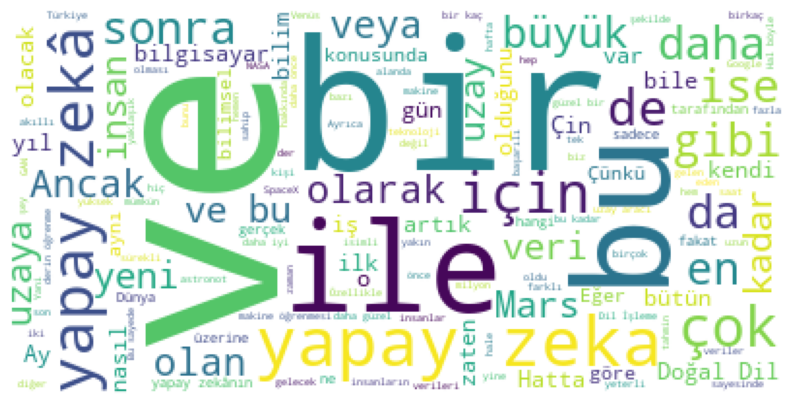

In [26]:
fnc_wc(df['yazi'],'white')